In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import datetime


In [2]:
# Chargement des données
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=columns)

# Ajout date d'examen
df['exam_date'] = pd.date_range(start='2023-01-01', periods=len(df))

In [3]:
# Affichage données
print("Aperçu des données:")
display(df.head())

Aperçu des données:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,exam_date
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,2023-01-01
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,2023-01-02
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,2023-01-03
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,2023-01-04
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,2023-01-05


# Explication des Données Médicales et leurs Unités

### Données Démographiques
- **age** : Âge en années
- **sex** : Genre (0 = femme, 1 = homme)

### Symptômes et Mesures Cliniques
- **cp** (chest pain) : Type de douleur thoracique (1-4)
- **restbps** : Tension artérielle au repos (mm Hg)
- **chol** : Cholestérol sérique (mg/dl)
- **fbs** : Glycémie à jeun (1 = >120 mg/dl, 0 = <120 mg/dl)

### Données Cardiaques
- **restecg** : Résultats ECG au repos
  - 0 = normal
  - 1 = anomalie ST-T
  - 2 = hypertrophie possible
- **thalach** : Fréquence cardiaque maximale atteinte (battements/minute)
- **exang** : Angine induite par l'exercice (0 = non, 1 = oui)
- **oldpeak** : Dépression ST induite par l'exercice par rapport au repos (mm)

### Analyses Complémentaires
- **slope** : Pente du segment ST à l'effort
  - 1 = montante
  - 2 = plate
  - 3 = descendante
- **ca** : Nombre de vaisseaux majeurs colorés par fluoroscopie (0-3)
- **thal** : Résultat de la scintigraphie au thallium (3-7)

### Classification
- **target** : Diagnostic 
  - 0 = sain
  - 1-4 = différents niveaux de gravité

### Administrative
- **exam_date** : Date de l'examen (AAAA-MM-JJ)

## En résumé
Ces données combinent :
- Mesures physiologiques (tension, fréquence cardiaque)
- Tests médicaux (ECG, scintigraphie)
- Symptômes rapportés (douleur thoracique)
- Données démographiques

In [ ]:
# Nettoyage des données
df = df.replace('?', np.nan)
for col in df.columns:
   df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(df.mean())

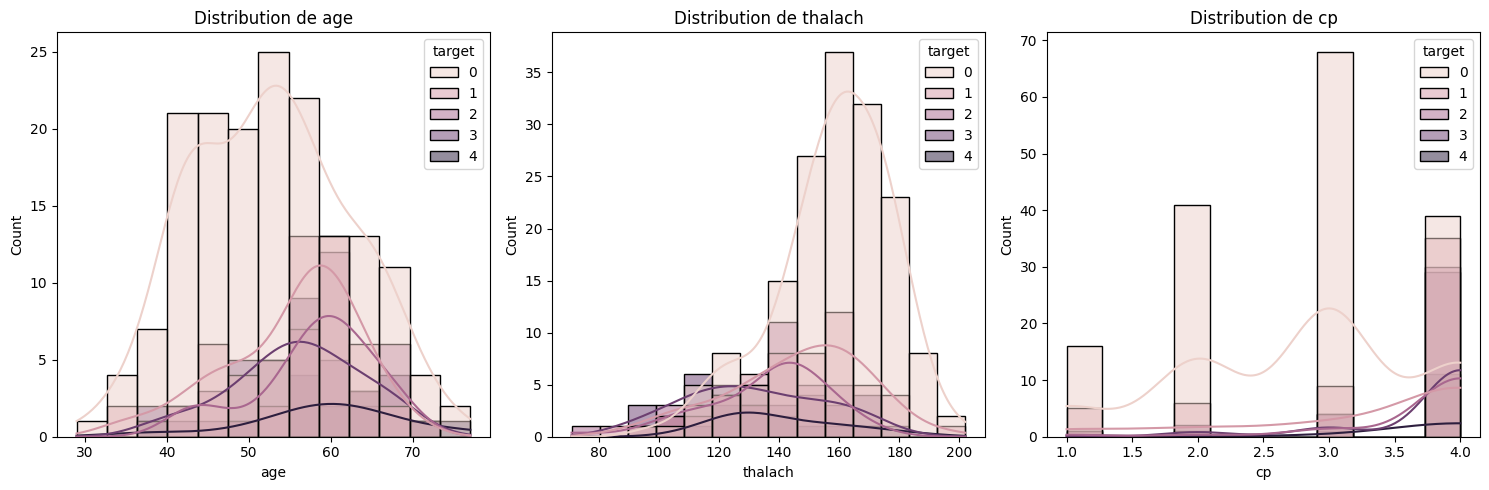

In [5]:
# 1. Distribution des features importantes
plt.figure(figsize=(15, 5))
features = ['age', 'thalach', 'cp']
for i, feature in enumerate(features):
   plt.subplot(1, 3, i+1)
   sns.histplot(data=df, x=feature, hue='target', kde=True)
   plt.title(f'Distribution de {feature}')
plt.tight_layout()
plt.show()

### 1. Distribution de l'Âge
- **Plage** : 30-70 ans
- **Observations** :
  - Pic principal vers 55-60 ans
  - Target 0 (sans maladie) : plus jeunes en moyenne
  - Target 4 (maladie sévère) : tendance vers les âges plus élevés

### 2. Distribution de Thalach (Fréquence cardiaque max)
- **Plage** : 80-200 battements/min
- **Observations** :
  - Pic vers 150-170 bpm
  - Target 0 : tendance aux fréquences plus élevées
  - Target 4 : fréquences plus basses

### 3. Distribution de CP (Douleur thoracique)
- **Valeurs** : 1, 2, 3, 4 (types de douleur)
- **Observations** :
  - Type 4 : plus fréquent avec target élevé
  - Type 2 : plus commun chez target 0

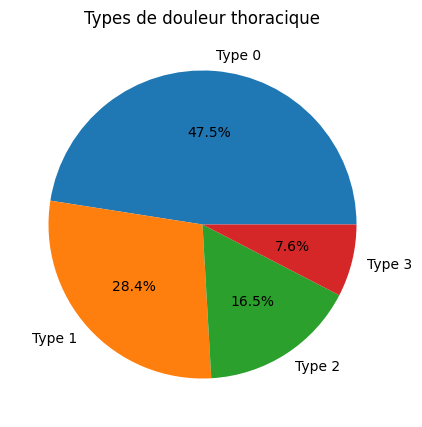

In [6]:
# 2. Analyse catégories (cp - douleur thoracique)
plt.figure(figsize=(8, 5))
cp_counts = df['cp'].value_counts()
plt.pie(cp_counts, labels=[f'Type {i}' for i in range(len(cp_counts))], autopct='%1.1f%%')
plt.title('Types de douleur thoracique')
plt.show()


# Les Types de Douleur Thoracique (CP - Chest Pain)

## Type 0 : Angine Typique (Angine Stable)
- **Caractéristiques principales**:
  - Douleur/gêne rétrosternale classique
  - Déclenchée par l'effort physique
  - Soulagée par le repos ou la nitroglycérine
  - Durée < 10 minutes
- **Localisation**: Derrière le sternum

## Type 1 : Angine Atypique
- **Caractéristiques principales**:
  - Remplit 2/3 critères de l'angine typique
  - Présentation inhabituelle
- **Particularités**:
  - Déclencheurs variés (pas uniquement l'effort)
  - Localisation peut être différente
  - Réponse variable au repos/nitroglycérine

## Type 2 : Douleur Non Angineuse
- **Caractéristiques principales**:
  - Remplit 0-1/3 critères de l'angine typique
  - Non liée à l'effort
- **Origines possibles**:
  - Musculosquelettique
  - Digestive
  - Anxieuse
  - Durée variable

## Type 3 : Asymptomatique
- **Caractéristiques principales**:
  - Absence de douleur thoracique
  - Peut présenter d'autres symptômes
- **Point important**:
  - Fréquent chez les diabétiques
  - Peut masquer une maladie coronarienne sévère
  - Nécessite une attention particulière

Problématique métier:
Prédire le risque de maladie cardiaque à partir des données médicales
pour aider au diagnostic précoce.

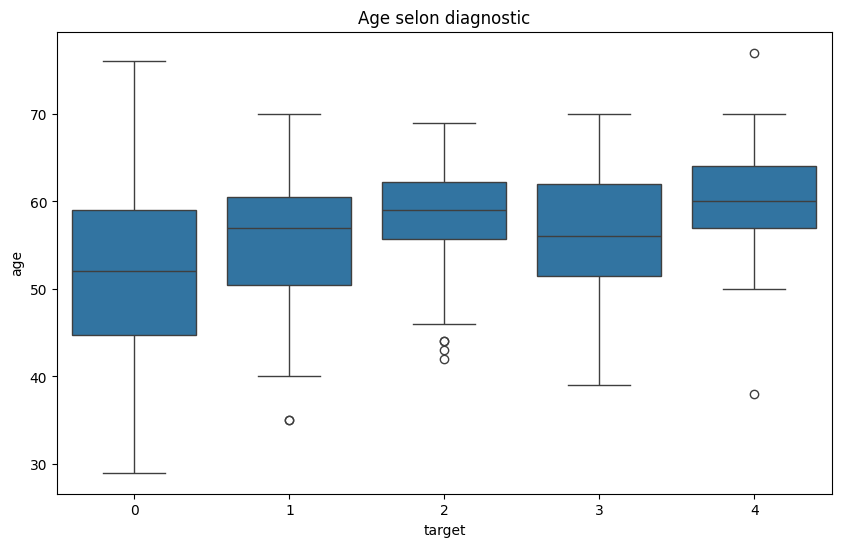

In [7]:
# 3. Boîte à moustaches
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age selon diagnostic')
plt.show()

### Comment lire les boîtes :
- La ligne du milieu = âge le plus courant
- La boîte = où se trouve la majorité des patients
- Les moustaches = les âges extrêmes (mais normaux)
- Les points = les cas très rares

### Ce qu'on apprend :
- Plus le diagnostic est avancé (0→4), plus les patients sont âgés
- Âge typique : entre 45-65 ans
- Quelques patients très jeunes ou très âgés dans chaque groupe

### À retenir :
- L'âge joue un rôle mais n'est pas le seul facteur
- Chaque groupe d'âge peut être concerné
- Important de faire des examens quel que soit l'âge



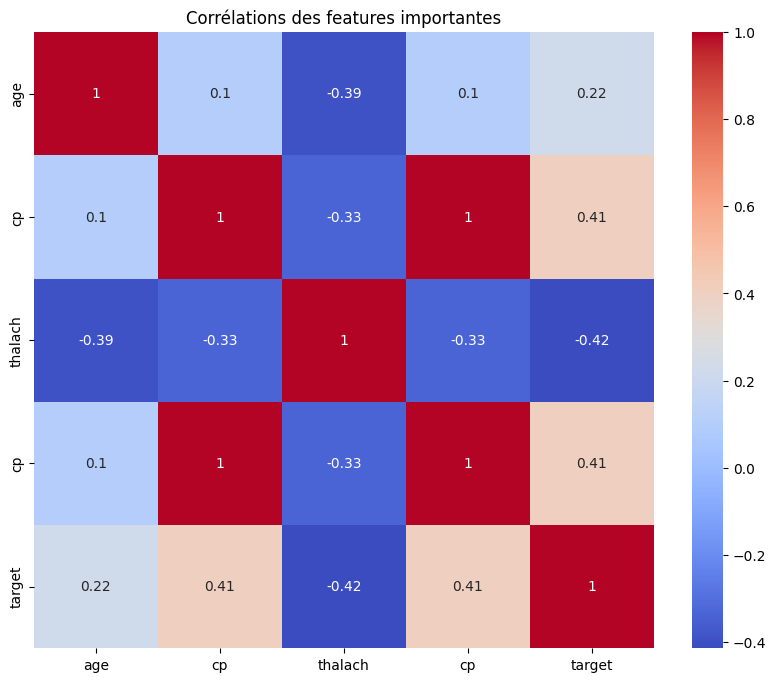

In [11]:
# 4. Heatmap
plt.figure(figsize=(10, 8))
important_features = ['age', 'cp', 'thalach', 'cp', 'target']
sns.heatmap(df[important_features].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélations des features importantes')
plt.show()

##  Analyse des Corrélations

### Les variables étudiées :
- **age** : Âge du patient
- **cp** : Type de douleur thoracique
- **thalach** : Fréquence cardiaque maximale
- **target** : Diagnostic final

###  Ce que nous montre la heatmap :

#### Corrélations Positives (Rouge) 
- **cp et target** : 
  - Plus forte corrélation positive
  - Le type de douleur thoracique est un bon indicateur du diagnostic

#### Corrélations Négatives (Bleu) 
- **age et thalach** :
  - Corrélation négative logique
  - Plus on vieillit, plus la fréquence cardiaque max diminue
- **thalach et target** :
  - Une fréquence cardiaque max plus basse suggère un diagnostic plus sévère
   
#### Corrélations Faibles (Blanc/Pâle) 
- **age et cp** :
  - Faible corrélation
  - Le type de douleur n'est pas fortement lié à l'âge

##  En résumé
- La douleur thoracique (cp) est le meilleur indicateur du diagnostic
- L'âge influence surtout la fréquence cardiaque
- Le diagnostic n'est pas fortement lié à l'âge seul

*Note : Cette version simplifiée de la heatmap nous donne une vue plus claire des relations principales entre les facteurs clés.*